# Supervised Learning Models

This notebook implements and evaluates multiple classification models:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)

Each model will be evaluated using:
- Accuracy, Precision, Recall, F1-score
- ROC Curve & AUC Score
- Confusion Matrix
- Cross-validation


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve, confusion_matrix,
                           classification_report)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load datasets
# We'll compare three different feature sets:
# 1. All features (scaled)
# 2. Selected features
# 3. PCA features

# All features
X_train_scaled = pd.read_csv('../data/X_train_scaled.csv')
X_test_scaled = pd.read_csv('../data/X_test_scaled.csv')

# Selected features
X_train_selected = pd.read_csv('../data/X_train_selected.csv')
X_test_selected = pd.read_csv('../data/X_test_selected.csv')

# PCA features
X_train_pca = pd.read_csv('../data/X_train_pca.csv')
X_test_pca = pd.read_csv('../data/X_test_pca.csv')

# Target variables
y_train = pd.read_csv('../data/y_train.csv').squeeze()
y_test = pd.read_csv('../data/y_test.csv').squeeze()

print("Dataset shapes:")
print(f"All features - Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")
print(f"Selected features - Train: {X_train_selected.shape}, Test: {X_test_selected.shape}")
print(f"PCA features - Train: {X_train_pca.shape}, Test: {X_test_pca.shape}")
print(f"Target - Train: {y_train.shape}, Test: {y_test.shape}")


Dataset shapes:
All features - Train: (242, 13), Test: (61, 13)
Selected features - Train: (242, 8), Test: (61, 8)
PCA features - Train: (242, 10), Test: (61, 10)
Target - Train: (242,), Test: (61,)


In [3]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Define datasets to test
datasets = {
    'All Features': (X_train_scaled, X_test_scaled),
    'Selected Features': (X_train_selected, X_test_selected),
    'PCA Features': (X_train_pca, X_test_pca)
}

print("Models to train:", list(models.keys()))
print("Feature sets to test:", list(datasets.keys()))


Models to train: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
Feature sets to test: ['All Features', 'Selected Features', 'PCA Features']


In [4]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, dataset_name):
    """
    Train and evaluate a model, returning comprehensive metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC (if probability predictions available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'trained_model': model
    }

print("Model evaluation function defined!")


Model evaluation function defined!


In [5]:
# Train and evaluate all models on all datasets
results = []

print("Training and evaluating models...")
print("="*50)

for dataset_name, (X_train_data, X_test_data) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    print("-" * 30)
    
    for model_name, model in models.items():
        print(f"Training {model_name}...", end=" ")
        
        # Create a fresh copy of the model for each evaluation
        model_copy = type(model)(**model.get_params())
        
        # Evaluate the model
        result = evaluate_model(model_copy, X_train_data, X_test_data, 
                              y_train, y_test, model_name, dataset_name)
        results.append(result)
        
        print(f"Accuracy: {result['Accuracy']:.3f}, F1: {result['F1-Score']:.3f}")

print(f"\nCompleted training {len(results)} model-dataset combinations!")


Training and evaluating models...

Dataset: All Features
------------------------------
Training Logistic Regression... Accuracy: 0.869, F1: 0.867
Training Decision Tree... Accuracy: 0.721, F1: 0.730
Training Random Forest... Accuracy: 0.885, F1: 0.885
Training SVM... Accuracy: 0.852, F1: 0.847

Dataset: Selected Features
------------------------------
Training Logistic Regression... Accuracy: 0.852, F1: 0.847
Training Decision Tree... Accuracy: 0.754, F1: 0.762
Training Random Forest... Accuracy: 0.852, F1: 0.852
Training SVM... Accuracy: 0.852, F1: 0.847

Dataset: PCA Features
------------------------------
Training Logistic Regression... Accuracy: 0.869, F1: 0.867
Training Decision Tree... Accuracy: 0.803, F1: 0.800
Training Random Forest... Accuracy: 0.852, F1: 0.842
Training SVM... Accuracy: 0.852, F1: 0.847

Completed training 12 model-dataset combinations!


In [6]:
# Create results summary DataFrame
results_df = pd.DataFrame([
    {
        'Model': r['Model'],
        'Dataset': r['Dataset'], 
        'Accuracy': r['Accuracy'],
        'Precision': r['Precision'],
        'Recall': r['Recall'],
        'F1-Score': r['F1-Score'],
        'ROC-AUC': r['ROC-AUC'],
        'CV Mean': r['CV Mean'],
        'CV Std': r['CV Std']
    }
    for r in results
])

# Display results
print("Model Performance Summary:")
print("="*80)
print(results_df.round(4).to_string(index=False))

# Find best model for each dataset
print("\n\nBest Models by Dataset (based on F1-Score):")
print("="*50)
for dataset in results_df['Dataset'].unique():
    dataset_results = results_df[results_df['Dataset'] == dataset]
    best_model = dataset_results.loc[dataset_results['F1-Score'].idxmax()]
    print(f"{dataset}: {best_model['Model']} (F1: {best_model['F1-Score']:.4f})")

# Overall best model
overall_best = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"\nOverall Best Model: {overall_best['Model']} on {overall_best['Dataset']}")
print(f"F1-Score: {overall_best['F1-Score']:.4f}, Accuracy: {overall_best['Accuracy']:.4f}")


Model Performance Summary:
              Model           Dataset  Accuracy  Precision  Recall  F1-Score  ROC-AUC  CV Mean  CV Std
Logistic Regression      All Features    0.8689     0.8125  0.9286    0.8667   0.9513   0.8264  0.0172
      Decision Tree      All Features    0.7213     0.6571  0.8214    0.7302   0.7289   0.6981  0.0237
      Random Forest      All Features    0.8852     0.8182  0.9643    0.8852   0.9513   0.7974  0.0248
                SVM      All Features    0.8525     0.8065  0.8929    0.8475   0.9437   0.8223  0.0249
Logistic Regression Selected Features    0.8525     0.8065  0.8929    0.8475   0.9351   0.8265  0.0156
      Decision Tree Selected Features    0.7541     0.6857  0.8571    0.7619   0.7619   0.7396  0.0285
      Random Forest Selected Features    0.8525     0.7879  0.9286    0.8525   0.9394   0.7934  0.0186
                SVM Selected Features    0.8525     0.8065  0.8929    0.8475   0.9383   0.8140  0.0185
Logistic Regression      PCA Features    0.868

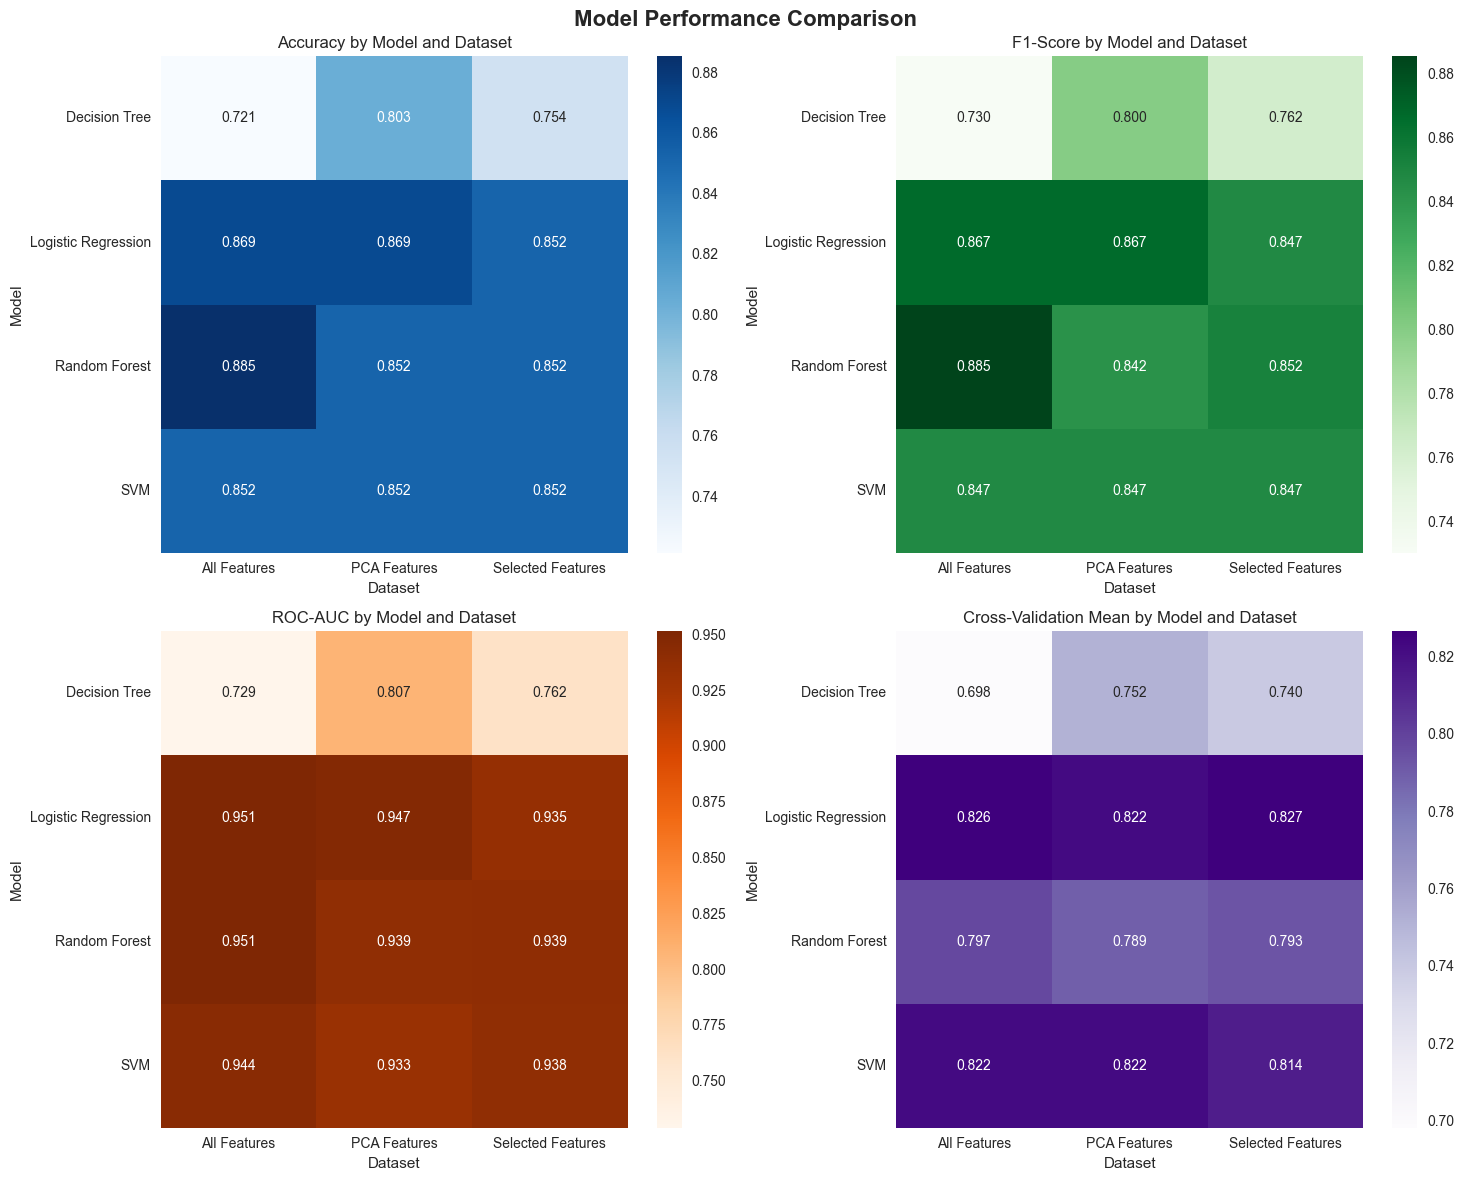

In [7]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy comparison
accuracy_pivot = results_df.pivot(index='Model', columns='Dataset', values='Accuracy')
sns.heatmap(accuracy_pivot, annot=True, fmt='.3f', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Accuracy by Model and Dataset')

# F1-Score comparison
f1_pivot = results_df.pivot(index='Model', columns='Dataset', values='F1-Score')
sns.heatmap(f1_pivot, annot=True, fmt='.3f', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title('F1-Score by Model and Dataset')

# ROC-AUC comparison
roc_pivot = results_df.pivot(index='Model', columns='Dataset', values='ROC-AUC')
sns.heatmap(roc_pivot, annot=True, fmt='.3f', cmap='Oranges', ax=axes[1,0])
axes[1,0].set_title('ROC-AUC by Model and Dataset')

# Cross-validation scores
cv_pivot = results_df.pivot(index='Model', columns='Dataset', values='CV Mean')
sns.heatmap(cv_pivot, annot=True, fmt='.3f', cmap='Purples', ax=axes[1,1])
axes[1,1].set_title('Cross-Validation Mean by Model and Dataset')

plt.tight_layout()
plt.show()


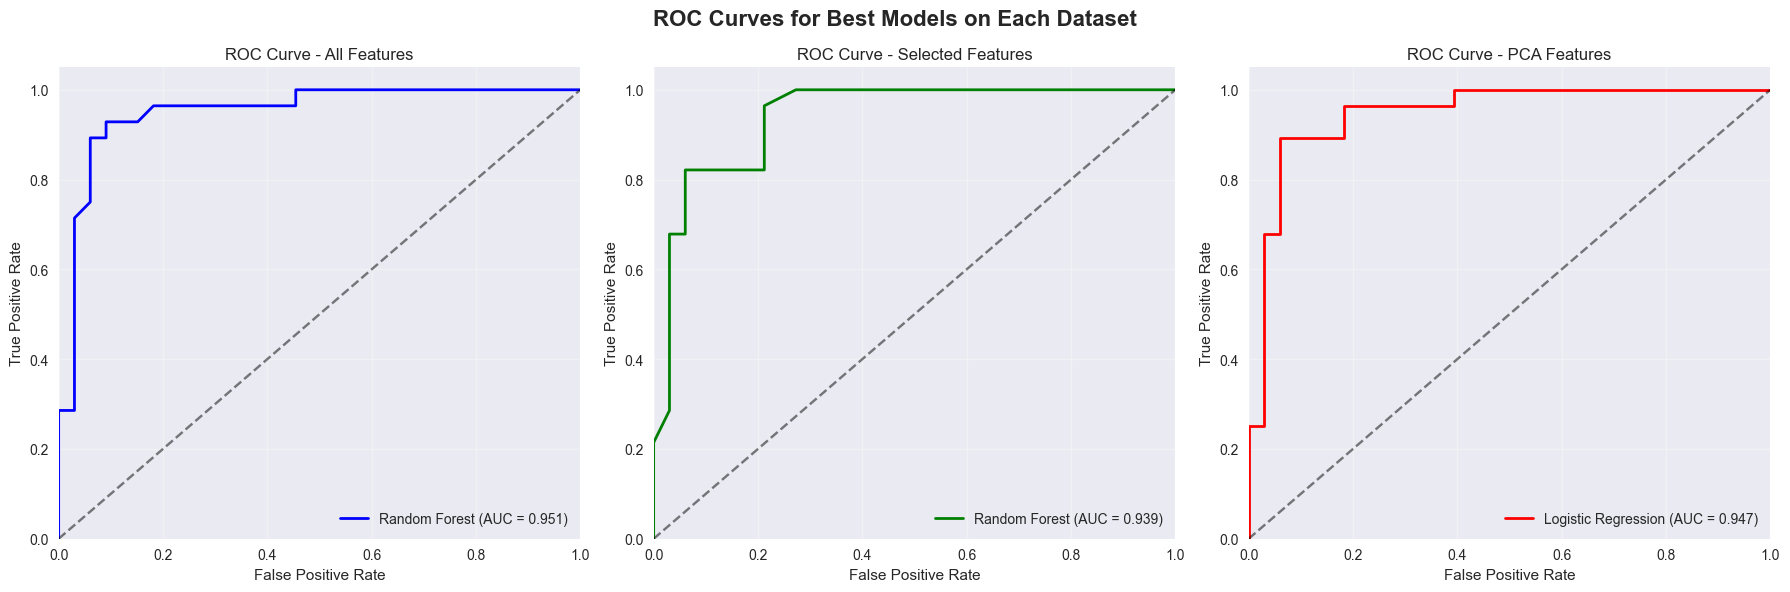

In [8]:
# ROC Curves for best performing models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ROC Curves for Best Models on Each Dataset', fontsize=16, fontweight='bold')

dataset_names = ['All Features', 'Selected Features', 'PCA Features']
colors = ['blue', 'green', 'red']

for i, (dataset_name, color) in enumerate(zip(dataset_names, colors)):
    # Find best model for this dataset
    dataset_results = [r for r in results if r['Dataset'] == dataset_name]
    best_result = max(dataset_results, key=lambda x: x['F1-Score'])
    
    if best_result['y_pred_proba'] is not None:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, best_result['y_pred_proba'])
        auc_score = best_result['ROC-AUC']
        
        # Plot ROC curve
        axes[i].plot(fpr, tpr, color=color, linewidth=2, 
                    label=f'{best_result["Model"]} (AUC = {auc_score:.3f})')
        axes[i].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve - {dataset_name}')
        axes[i].legend(loc="lower right")
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# Save results and models
results_df.to_csv('../results/supervised_learning_results.csv', index=False)

# Save the best performing models
best_models = {}
for dataset_name in ['All Features', 'Selected Features', 'PCA Features']:
    dataset_results = [r for r in results if r['Dataset'] == dataset_name]
    best_result = max(dataset_results, key=lambda x: x['F1-Score'])
    model_name = f"best_{dataset_name.lower().replace(' ', '_')}_model"
    best_models[model_name] = best_result['trained_model']
    joblib.dump(best_result['trained_model'], f'../models/{model_name}.pkl')

# Save overall best model as the final model
overall_best_result = max(results, key=lambda x: x['F1-Score'])
joblib.dump(overall_best_result['trained_model'], '../models/best_supervised_model.pkl')

print("✅ Supervised learning completed!")
print("✅ Model performance results saved!")
print("✅ Best models saved!")
print(f"\nSummary:")
print(f"- Total models trained: {len(results)}")
print(f"- Best overall model: {overall_best_result['Model']} on {overall_best_result['Dataset']}")
print(f"- Best F1-Score: {overall_best_result['F1-Score']:.4f}")
print(f"- Best Accuracy: {overall_best_result['Accuracy']:.4f}")
print(f"- Best ROC-AUC: {overall_best_result['ROC-AUC']:.4f}")
print("\nFiles saved:")
print("- ../results/supervised_learning_results.csv")
print("- ../models/best_*_model.pkl")
print("- ../models/best_supervised_model.pkl")


✅ Supervised learning completed!
✅ Model performance results saved!
✅ Best models saved!

Summary:
- Total models trained: 12
- Best overall model: Random Forest on All Features
- Best F1-Score: 0.8852
- Best Accuracy: 0.8852
- Best ROC-AUC: 0.9513

Files saved:
- ../results/supervised_learning_results.csv
- ../models/best_*_model.pkl
- ../models/best_supervised_model.pkl
